<a href="https://colab.research.google.com/github/InsightfulAnalyzer/Lognormal_Analytics/blob/main/Lognormal_Analytics_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Sample_Data.xlsx')

In [ ]:
#data look --> top 5 rows
df.head()

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank
0,2023-05-16 10:23:19.382,1,Electronics,Mobile Phone,487.45,509.42,EUR,65.0,3793.97,3.4,5,16,4079,1
1,2023-05-16 10:23:19.382,2,Electronics,Bluetooth Headphones,156.66,163.53,EUR,974.0,503.50,4.4,5,51,2072,3
2,2023-05-16 10:23:19.382,3,Electronics,Tablet,283.97,272.34,EUR,74.0,3282.74,4.1,5,62,2917,5
3,2023-05-16 10:23:19.382,4,Clothing,Luxury Jacket,435.91,456.21,EUR,686.0,4137.79,4.4,4,115,2208,1
4,2023-05-16 10:23:19.382,5,Clothing,Casual T-Shirt,30.66,31.68,EUR,193.0,1280.14,3.4,4,140,1122,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     1040 non-null   datetime64[ns]
 1   Product ID               1040 non-null   int64         
 2   Category                 1040 non-null   object        
 3   Product Name             1040 non-null   object        
 4   Price                    1040 non-null   float64       
 5   Competitor Price         1040 non-null   float64       
 6   Pricing Currency         1040 non-null   object        
 7   Sales Volume             1023 non-null   float64       
 8   Advertising Spend (EUR)  1020 non-null   float64       
 9   Customer Reviews         1034 non-null   float64       
 10  Weather Index            1040 non-null   int64         
 11  Social Media Mentions    1040 non-null   int64         
 12  Warehouse Stock Level    1040 non-

- Data Structure

1040 rows, 14 columns → Looks like weekly records for 10 products over.

No major dtype issues — all columns are correctly typed (e.g., dates, floats, strings).

In [ ]:
df['Product Name'].value_counts()

,count
Product Name,
Mobile Phone,104
Bluetooth Headphones,104
Tablet,104
Luxury Jacket,104
Casual T-Shirt,104
Jeans,104
Coffee Maker,104
Coffee Filters,104
Blender,104


In [ ]:
print(f"Weeks range from {df['Week'].min().date()} to {df['Week'].max().date()}")

Weeks range from 2023-05-16 to 2025-05-06


In [ ]:
df['Week'].nunique()

104

In [ ]:
#checking null values:

df.isnull().sum()

,0
Week,0
Product ID,0
Category,0
Product Name,0
Price,0
Competitor Price,0
Pricing Currency,0
Sales Volume,17
Advertising Spend (EUR),20
Customer Reviews,6


**Insight:**

Sales Volume =	17	--> Need to handle - this is our primary KPI. Drop or impute.

Advertising Spend (EUR)	= 20 -->	Segment analysis might need this — consider median imputation.

Customer Reviews = 6 -->	Optional for segmenting, safe to impute or drop if small.

In [ ]:
print(df['Sales Volume'].skew())
print(df['Advertising Spend (EUR)'].skew())

0.06434576673511709
0.04408801153037618


Skew Value	Interpretation

= 0	Normal (symmetric) distribution

greater than 0	Right skewed (long tail on the right) — few very high values

less than 0	Left skewed (long tail on the left) — few very low values

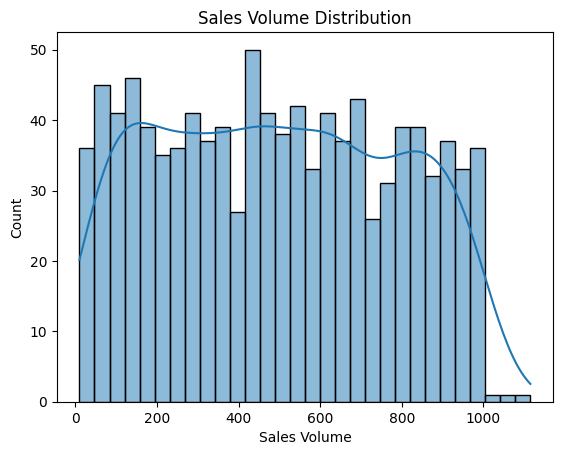

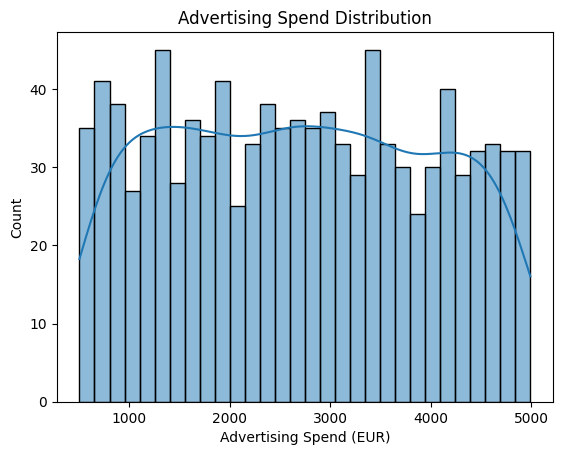

In [ ]:
sns.histplot(df['Sales Volume'], bins=30, kde=True)
plt.title('Sales Volume Distribution')
plt.show()

sns.histplot(df['Advertising Spend (EUR)'], bins=30, kde=True)
plt.title('Advertising Spend Distribution')
plt.show()

In [ ]:
# Median imputation for safety --> We go ahead with imputing instead of drop, just for safety purpose
df['Sales Volume'].fillna(df['Sales Volume'].median(), inplace=True)
df['Advertising Spend (EUR)'].fillna(df['Advertising Spend (EUR)'].median(), inplace=True)
df['Customer Reviews'].fillna(df['Customer Reviews'].median(), inplace=True)


/tmp/ipython-input-13-420267878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales Volume'].fillna(df['Sales Volume'].median(), inplace=True)
/tmp/ipython-input-13-420267878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

**Why did you use the median instead of the average (mean) to impute missing values?**
(for mansi)

My Answer :
I used the median because it’s more robust to outliers.
In sales data — especially Sales Volume or Advertising Spend — values often have skewed distributions due to occasional spikes or promotional weeks.
Using the mean in such cases could distort the imputation by pulling values toward the extremes. The median, on the other hand, gives a better central tendency without being impacted by outliers.

For instance, if one product had a massive sales week due to a flash sale, that could inflate the average, making the imputed values unrealistic for normal cases. The median avoids that pitfall.


-- Of course, if the data was normally distributed, I'd have considered the mean — but I confirmed that Sales Volume and Ad Spend showed skewness, so median was the safer choice for maintaining data integrity.

In [ ]:
df.isnull().sum()

,0
Week,0
Product ID,0
Category,0
Product Name,0
Price,0
Competitor Price,0
Pricing Currency,0
Sales Volume,0
Advertising Spend (EUR),0
Customer Reviews,0


In [ ]:
df.duplicated().sum()

np.int64(0)

- No Missing Value - tick
- data types are correct - tick
- no duplicated data - tick

In [ ]:
np.unique(df['Product Name'])

array(['Blender', 'Bluetooth Headphones', 'Casual T-Shirt',
       'Coffee Filters', 'Coffee Maker', 'Jeans', 'Luxury Jacket',
       'Mobile Phone', 'Tablet', 'Vacuum Cleaner'], dtype=object)

## **Segment Influence Analysis**:

**CREATE SEGMENT**

1. Ad Segment – High Ad vs Low Ad

In [ ]:
df['Ad_Segment'] = df['Advertising Spend (EUR)'].apply( lambda x: 'High Ad' if x > df['Advertising Spend (EUR)'].median() else 'Low Ad')

*Insight:*
I used the median of Advertising Spend to split products into:

- 'High Ad' if the spend was above median

- 'Low Ad' if the spend was at or below median

This helped me assess whether products with heavier advertising were linked to higher sales in each category.

2. Price Segment – Premium vs Budget

In [ ]:
df['Price_Segment'] = df['Price'].apply(lambda x: 'Premium' if x > df['Price'].median() else 'Budget')

*Insight:* I used the median of Price to segment products as:

- 'Premium' (above median)

- 'Budget' (below or equal to median)

This allowed me to check if higher-priced or budget products were more dominant in each category’s sales.



3. Review Segment – Top Rated vs Low Rated

In [ ]:
df['Review_Segment'] = df['Customer Reviews'].apply( lambda x: 'Top Rated' if x >= 4 else 'Low Rated')

*Insgiht:* I created this by checking:

'Top Rated' if average Customer Review ≥ 4

'Low Rated' if less than 4

It helped understand whether product quality perception had an impact on sales.

4. Buzz Segment – High Buzz vs Low Buzz

In [ ]:
df['Buzz_Segment'] = df['Social Media Mentions'].apply( lambda x: 'High Buzz' if x > df['Social Media Mentions'].median() else 'Low Buzz')

Insight: Based on Social Media Mentions, I again used the median as a cutoff:

- 'High Buzz' = above median

- 'Low Buzz' = below or equal to median

This segment acted as a proxy for customer interest or awareness.

**Analyze Segment Impact:**

1. Total Sales Volume by Category

<Axes: title={'center': 'Total Sales Volume by Category'}, xlabel='Category'>

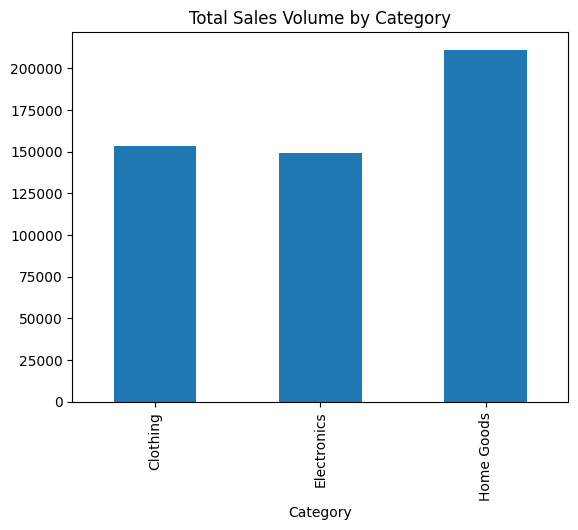

In [ ]:
df.groupby('Category')['Sales Volume'].sum().plot(kind='bar', title='Total Sales Volume by Category')


*Insight:*

Chart: Total Sales Volume by Category

Based on the analysis of total sales volume across product categories:

- Home Goods had the highest sales volume,

- Followed by Clothing, and

- Then Electronics.

-- Sales volume here refers to the quantity of units sold, not revenue, so it tells us where customer demand (in units) was strongest over the period analyzed.

2. Sales Volume by Ad Segment per Category

<Axes: title={'center': 'Sales by Ad Segment in Each Category'}, xlabel='Category'>

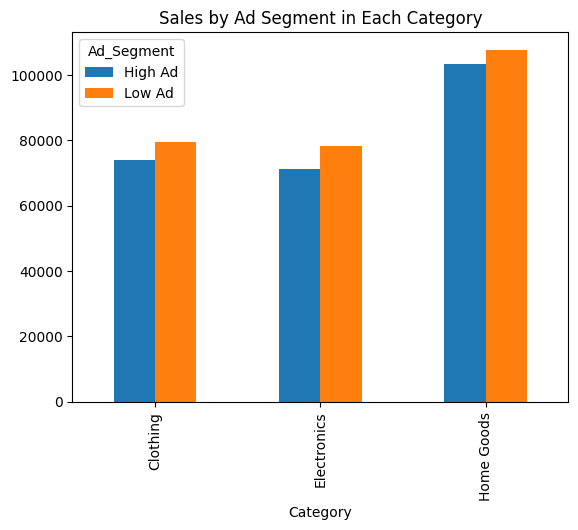

In [ ]:
df.groupby(['Category', 'Ad_Segment'])['Sales Volume'].sum().unstack().plot(
    kind='bar', title='Sales by Ad Segment in Each Category')


*Insight:*
- Across all three categories
 - Clothing,
 - Electronics, and
 - Home Goods

 **products** with **lower advertising spend** achieved **higher total sales volume** than those with **higher spend**.

- This **suggests** that **higher ad spend does not necessarily correlate with higher sales**, at least in **terms of volume**.

- It could indicate:

 - That popular products are organically strong performers with less need for advertising, or

 - That advertising is being spent on underperforming products to boost awareness, but isn’t converting to volume.

3. Price Segment Impact

<Axes: title={'center': 'Sales by Price Segment in Each Category'}, xlabel='Category'>

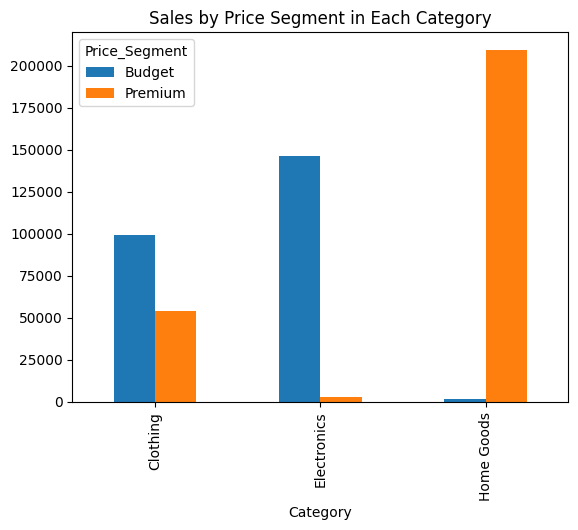

In [ ]:
df.groupby(['Category', 'Price_Segment'])['Sales Volume'].sum().unstack().plot(
    kind='bar', title='Sales by Price Segment in Each Category')


*Insight:*

This visual **compares** **total sales volume (quantity sold)** of **Budget vs Premium** products across each **category**.

- Home Goods
  - Premium products dominate massively in volume over 200,000 units sold.
  - Suggests strong consumer preference for higher end items in home essentials, likely due to long-term usage, durability, or brand trust.

- Electronics
  - Budget products clearly lead the segment.
  - Indicates customer preference for affordable gadgets, possibly because of frequent upgrades tech or price sensitivity in tech.

- Clothing
  - While Budget clothing leads in quantity, Premium clothing still holds a noticeable chunk (~50,000 units).
  - This reflects a mixed market with high demand for budget apparel, but also a non-negligible premium segment



##### This actually helping us in one : that **Pricing strategy should be category-specific.**
  - Go premium-focused in Home Goods,
  - Push value-for-money in Electronics,
  - Offer tiered options in Clothing to cater to both price-sensitive and brand-conscious buyers.




4. Review Segment Impact

<Axes: title={'center': 'Sales by Customer Rating in Each Category'}, xlabel='Category'>

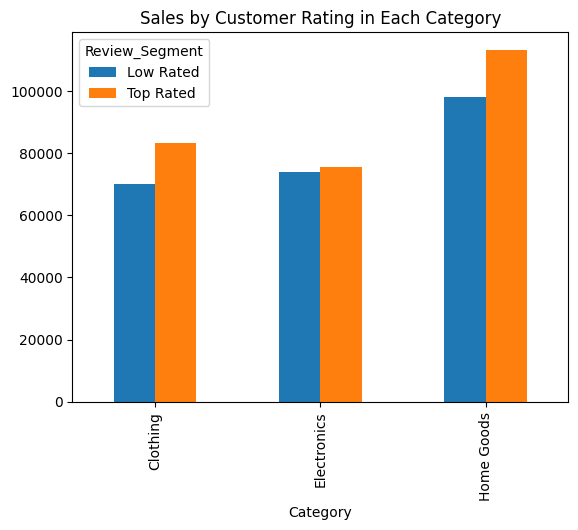

In [ ]:
df.groupby(['Category', 'Review_Segment'])['Sales Volume'].sum().unstack().plot( kind='bar', title='Sales by Customer Rating in Each Category')


*Insight:*

Clothing:
  - Top Rated products clearly outperform Low Rated ones in volume.
  - Positive reviews seem to strongly influence clothing purchases -  likely due to concerns over size, fit, material, etc.
  - People trust reviews before buying wearables.

Electronics:
 - The difference is very small between Top Rated and Low Rated.
 - Customer ratings have a neutral or weak influence here.
 - Customers may be more driven by price/specifications than review stars.
Or may be they buy known brands where trust is already built-in.

Home Goods:
 - Top Rated again wins, and by a decent margin.
 - Buyers likely rely on reviews for quality/durability expectations.

/tmp/ipython-input-25-722933366.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-25-722933366.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-25-722933366.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-25-722933366.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


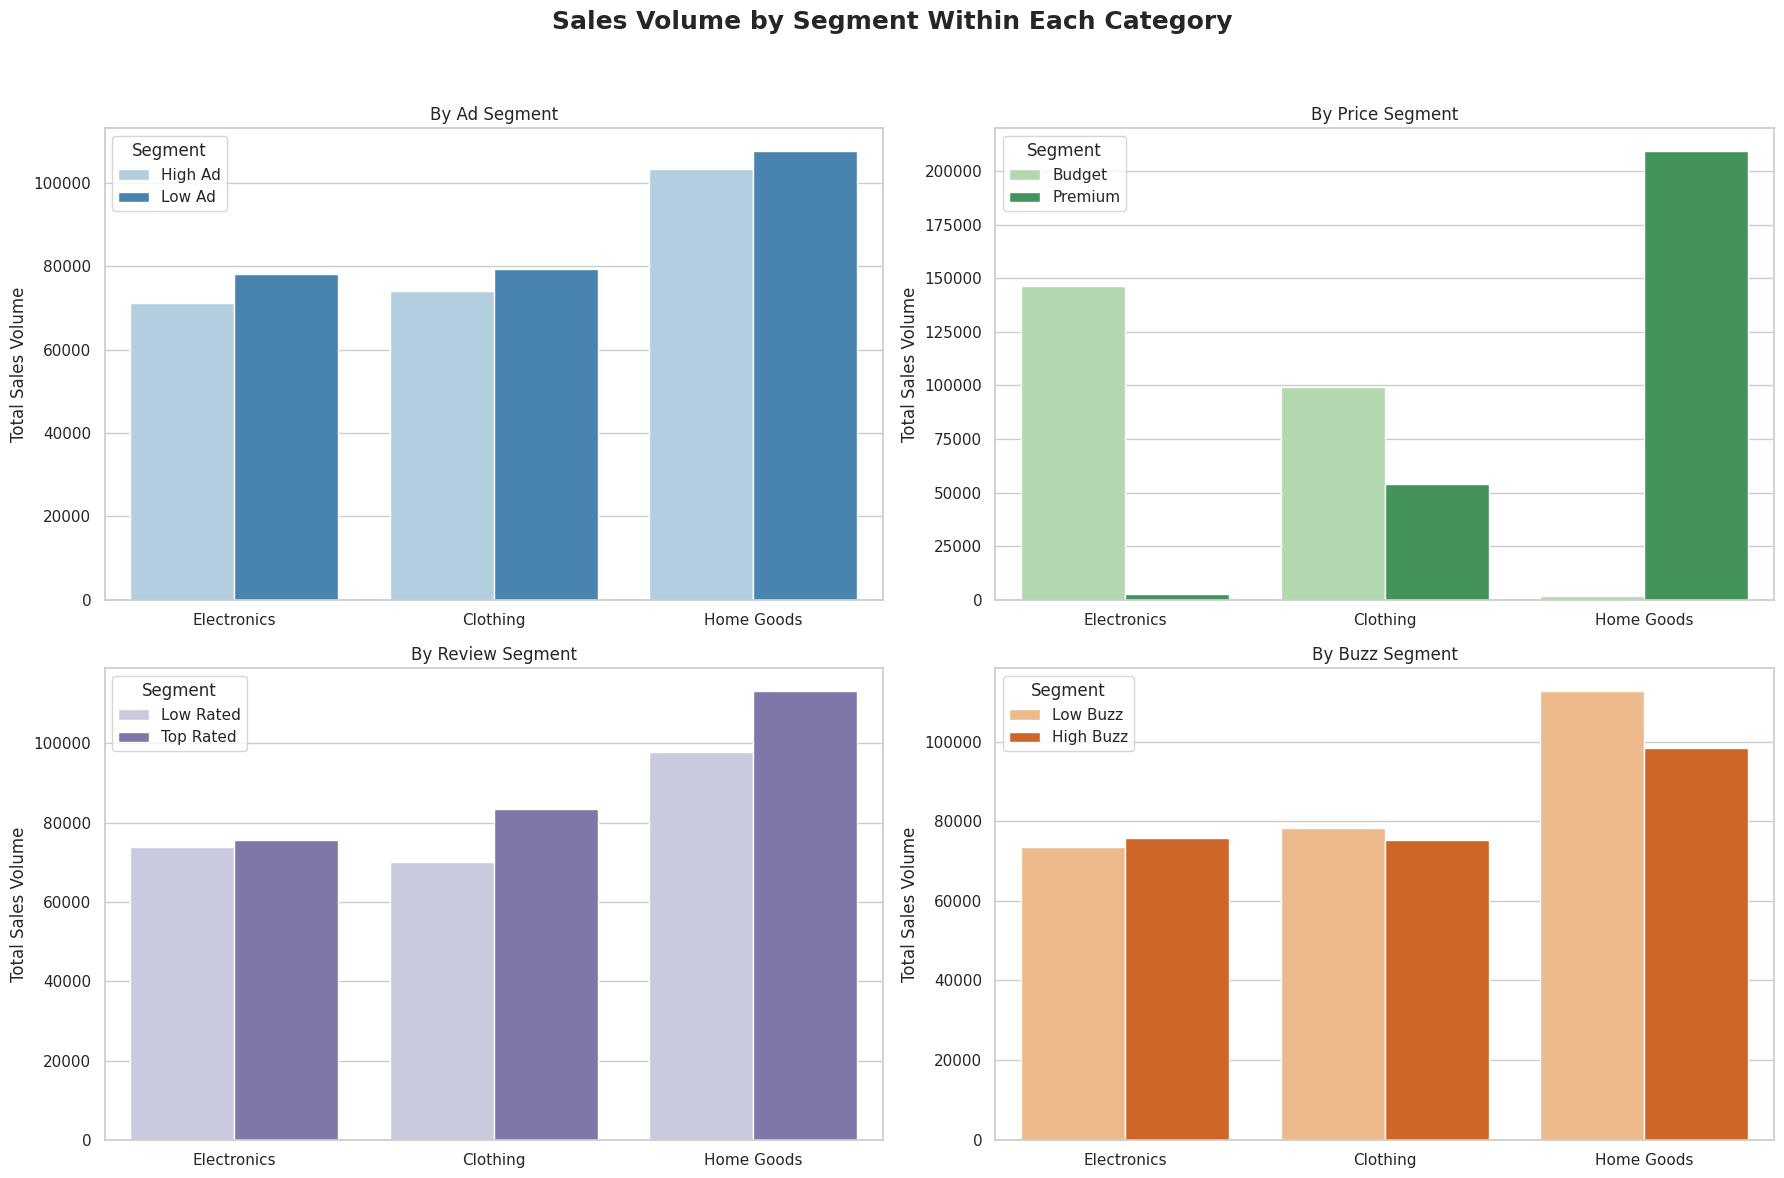

In [ ]:
# Set plot style
sns.set(style='whitegrid')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Sales Volume by Segment Within Each Category", fontsize=18, fontweight='bold')

# Ad Segment per Category
sns.barplot(
    x='Category', y='Sales Volume', hue='Ad_Segment',
    data=df, estimator='sum', ci=None, ax=axs[0, 0], palette='Blues'
)
axs[0, 0].set_title('By Ad Segment')

# Price Segment per Category
sns.barplot(
    x='Category', y='Sales Volume', hue='Price_Segment',
    data=df, estimator='sum', ci=None, ax=axs[0, 1], palette='Greens'
)
axs[0, 1].set_title('By Price Segment')

# Review Segment per Category
sns.barplot(
    x='Category', y='Sales Volume', hue='Review_Segment',
    data=df, estimator='sum', ci=None, ax=axs[1, 0], palette='Purples'
)
axs[1, 0].set_title('By Review Segment')

# Buzz Segment per Category
sns.barplot(
    x='Category', y='Sales Volume', hue='Buzz_Segment',
    data=df, estimator='sum', ci=None, ax=axs[1, 1], palette='Oranges'
)
axs[1, 1].set_title('By Buzz Segment')

# Label cleanups
for ax in axs.flat:
    ax.set_xlabel('')
    ax.set_ylabel('Total Sales Volume')
    ax.legend(title='Segment')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Trend Detection Analysis**

1. Time-Based Trend Detection

/tmp/ipython-input-26-1171517982.py:14: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


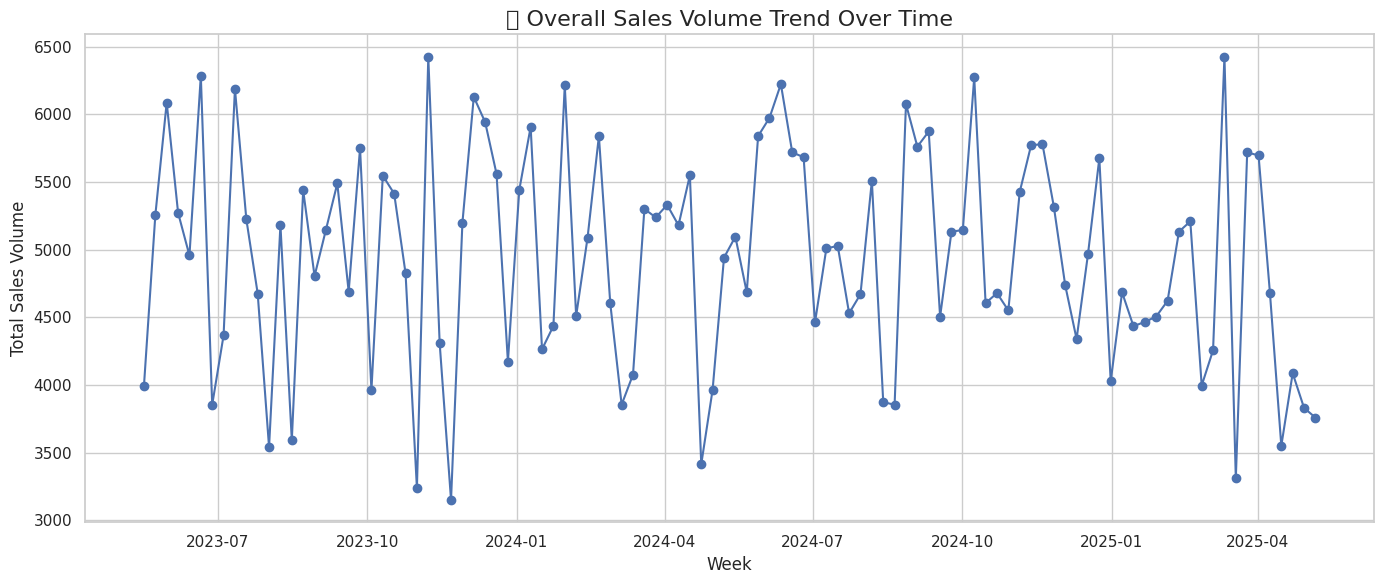

In [ ]:
# Overall Weekly Sales Trend


# Group by Week and sum Sales Volume
weekly_sales = df.groupby('Week')['Sales Volume'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Sales Volume'], marker='o', linestyle='-')
plt.title('📅 Overall Sales Volume Trend Over Time', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

*observation:*
- Sales fluctuate week to week, showing no consistent upward or downward trend.
- There are frequent peaks and dips, suggesting possible external factors like seasonal promotions, campaigns, or events.
- No clear "growth trend" is visible — this means our business is not steadily increasing sales over time.

*Insight:*
- The overall sales volume displays high weekly volatility, indicating that external or campaign-driven factors may influence purchasing behavior more than consistent demand growth.
- There’s no strong upward or downward trend, which may signal the need for more consistent marketing or customer retention strategies.

/tmp/ipython-input-27-2205246740.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


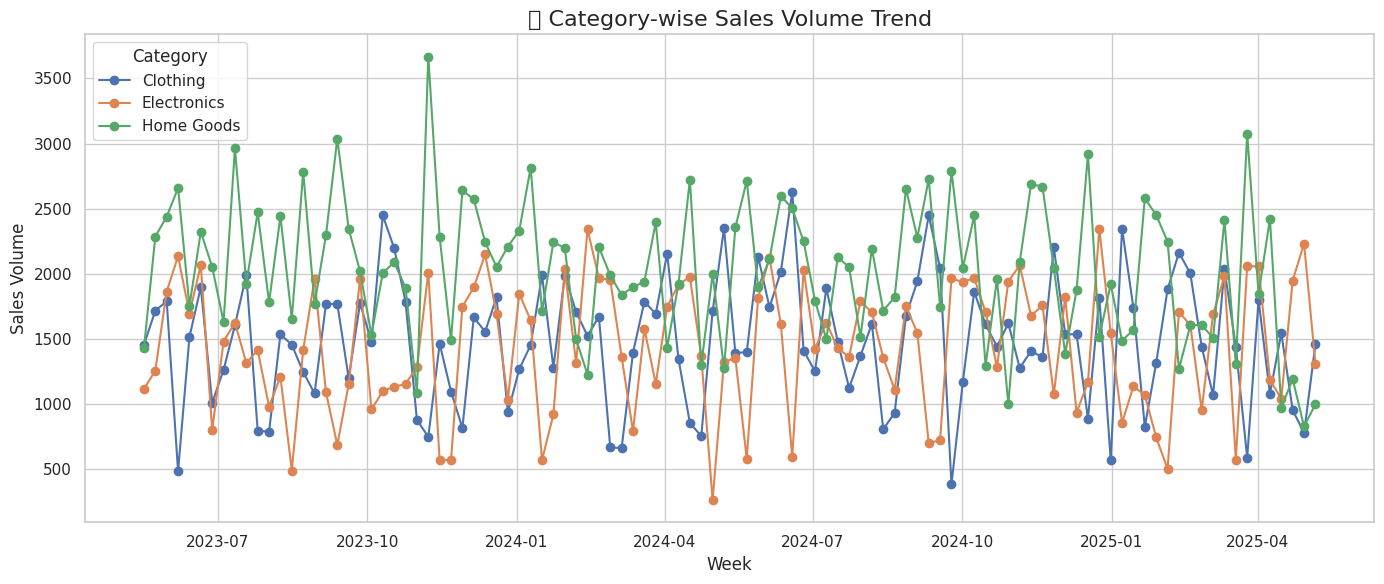

In [ ]:
# Category-wise Weekly Trend

# Group by Week and Category
category_trend = df.groupby(['Week', 'Category'])['Sales Volume'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
for category in category_trend['Category'].unique():
    data = category_trend[category_trend['Category'] == category]
    plt.plot(data['Week'], data['Sales Volume'], marker='o', label=category)

plt.title('📅 Category-wise Sales Volume Trend', fontsize=16)
plt.xlabel('Week')
plt.ylabel('Sales Volume')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()


*observation:*
- Home Goods consistently maintains the highest sales volume, though it also has significant ups and downs.
- Clothing and Electronics often fluctuate at similar levels but seem more sensitive to dips.
- Occasionally, all categories dip together may be due to potential seasonality or low-demand weeks.

*Insight:*
- Among the three categories, Home Goods demonstrates consistently higher sales, reaffirming strong and steady demand.
- Clothing and Electronics experience more erratic patterns, suggesting either inconsistent demand or price sensitivity.
- Synchronized dips across categories may point to seasonal slowdowns or low-performing weeks, which can be aligned with future promotion schedules.

## **Competitor Impact Assessment:**

In [ ]:
# Feature Engineering- Create a column to compare our price to competitor’s.

df['Price_Diff'] = df['Competitor Price'] - df['Price']
df['Price_Diff'].head()
# this tells us:
# Positive value = We’re cheaper than competitor (good for us)
# Negative value = We’re more expensive (bad for us)

,Price_Diff
0,21.97
1,6.87
2,-11.63
3,20.30
4,1.02


In [ ]:
# Correlation Check - How strongly is Competitor Price related to Sales Volume?

df[['Competitor Price', 'Sales Volume']].corr()

# If correlation is positive, then → when competitor price increases, our sales go up (great for us).
# If negative, maybe people still buy competitor’s product even at higher price

,Competitor Price,Sales Volume
Competitor Price,1.000000,-0.005246
Sales Volume,-0.005246,1.000000


*Insight:*
- The Pearson correlation coefficient between Competitor Price and Sales Volume is -0.0052, which is very close to zero.

Interpretation: There is no significant linear relationship between competitor pricing and sales volume. Changes in competitor prices do not directly influence our sales.

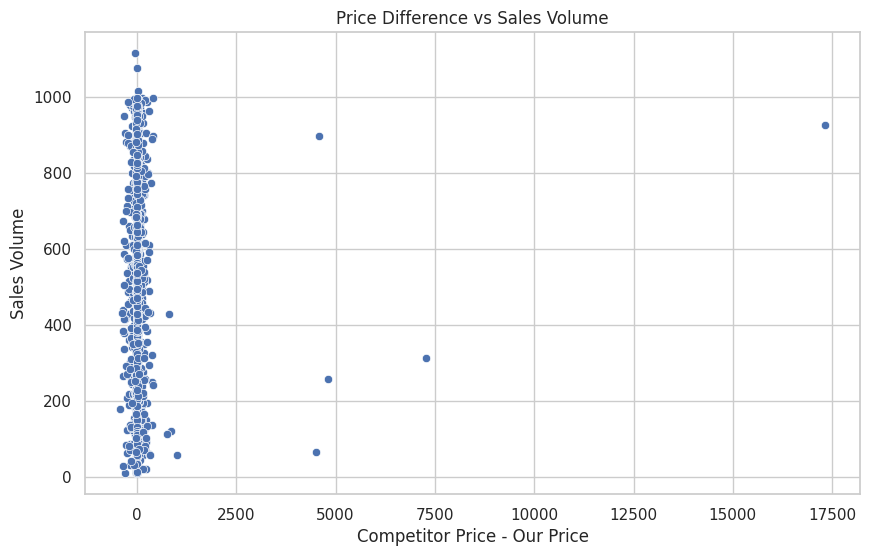

In [ ]:
# Scatter Plot (Visual Check)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_Diff', y='Sales Volume', data=df)
plt.title('Price Difference vs Sales Volume')
plt.xlabel('Competitor Price - Our Price')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

*Insight:*
- The scatter plot of Price Difference (Competitor - Our Price) vs Sales Volume shows a high concentration of points around the 0–2000 range, with a few extreme outliers.
- No clear upward or downward trend is visible, which reinforces the weak correlation finding.

In [ ]:
# Create a Segment Column

df['Price_Position'] = df['Price_Diff'].apply(lambda x: 'Cheaper' if x > 0 else 'Costlier')
df.groupby('Price_Position')['Sales Volume'].mean()

,Sales Volume
Price_Position,
Cheaper,494.380435
Costlier,494.028689



*Insight:*

Segment Analysis (Cheaper vs Costlier):
- The dataset is segmented into two categories:
  - Cheaper (Our price < Competitor's price)
  - Costlier (Our price > Competitor's price)

Average Sales Volume:
  - When we are cheaper: 494.38
  - When we are costlier: 494.03

Interpretation: The difference is negligible, suggesting that being cheaper than the competitor does not significantly increase sales volume.

<Axes: xlabel='Price_Position', ylabel='Sales Volume'>

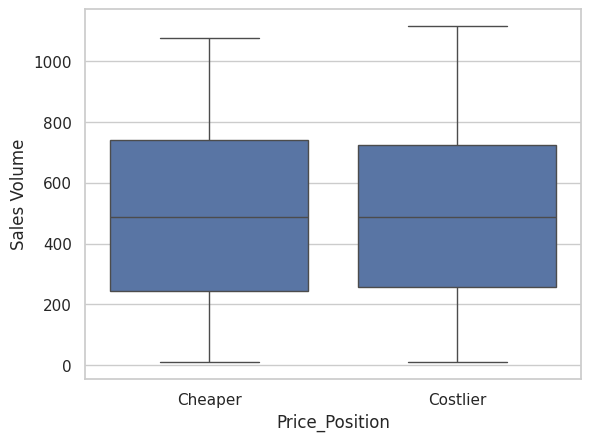

In [ ]:
sns.boxplot(x='Price_Position', y='Sales Volume', data=df)

*Insight:*

- The boxplots for both Cheaper and Costlier segments show similar distribution and spread of sales volume.
- Median values and interquartile ranges are nearly the same, which further confirms that price positioning relative to competitors has minimal impact on sales volume.



## **Operational and Environmental Factor Check**

**Stock Level vs Sales Volume**
- To check if low stock levels are causing low sales —> which would mean we’re missing demand due to poor inventory planning.

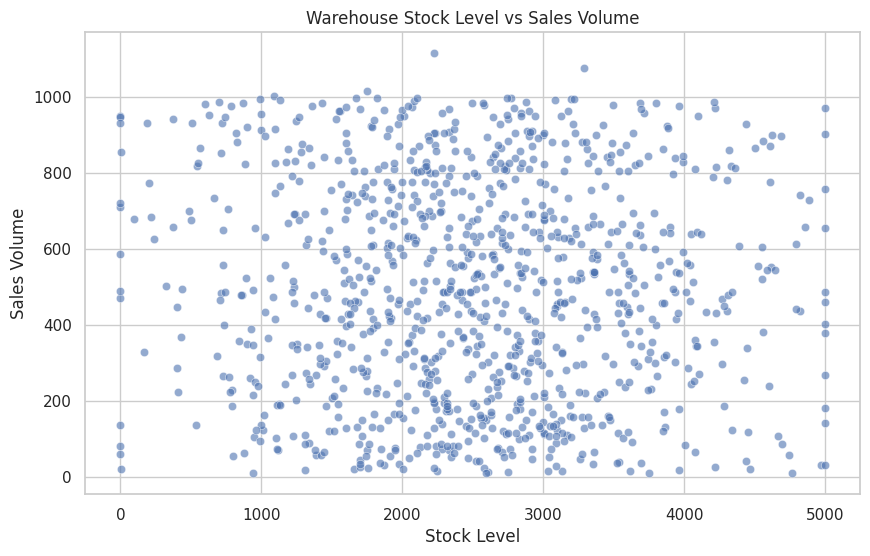

In [ ]:
# Scatter plot to see raw relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Warehouse Stock Level', y='Sales Volume', alpha=0.6)
plt.title('Warehouse Stock Level vs Sales Volume')
plt.xlabel('Stock Level')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

In [ ]:
corr = df[['Warehouse Stock Level', 'Sales Volume']].corr()
print("Correlation:\n", corr)

Correlation:
                        Warehouse Stock Level  Sales Volume
Warehouse Stock Level               1.000000     -0.033429
Sales Volume                       -0.033429      1.000000


*Insight:*
- An analysis of Warehouse Stock Level against Sales Volume shows a near-zero correlation (-0.033), indicating that the number of units in stock had minimal impact on sales performance.
- This suggests that low sales are not due to inventory shortages, but rather driven by other demand-side factors such as customer interest, product appeal, or external influences like pricing, buzz, or seasonality.

**Weather Index vs Sales Volume**
- Checking whether weather conditions (as per Weather Index) impact how much we sell (Sales Volume).

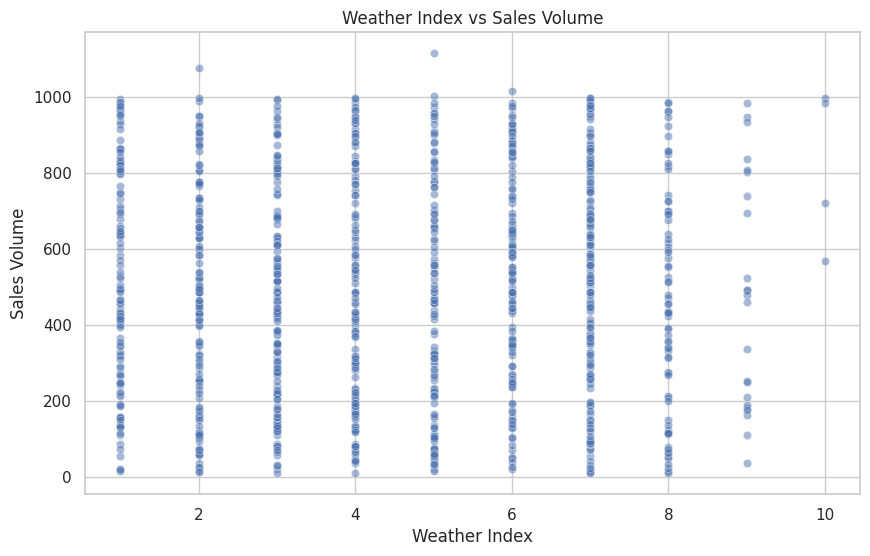

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weather Index', y='Sales Volume', alpha=0.5)
plt.title('Weather Index vs Sales Volume')
plt.xlabel('Weather Index')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()


In [ ]:
corr = df[['Weather Index', 'Sales Volume']].corr()
print("Correlation:\n", corr)

Correlation:
                Weather Index  Sales Volume
Weather Index       1.000000      0.019914
Sales Volume        0.019914      1.000000


*Insight:*

That’s basically zero — just slightly positive, but statistically insignificant.

- The correlation between the Weather Index and Sales Volume was found to be very weak (+0.019), indicating no meaningful relationship between weather conditions and customer purchasing behavior.
- This suggests that sales trends are not influenced by seasonal or weather-based changes, and product demand is likely driven more by marketing efforts, product category, or consumer need rather than climate conditions.



**Lag Effect on Advertisment Spend:-**
- Sometimes, marketing efforts (like ads) don’t create instant sales. The impact comes a week later — this is called a lag effect.
- Check if Ad Spend this week boosts Sales Volume next week
(We’ll "shift" the Ad Spend data by 1 week and compare it with future sales.)

In [ ]:
# Sort the data properly (We need Week-wise data per product)

df = df.sort_values(by=['Product ID', 'Week'])

In [ ]:
# Shift Ad Spend forward by 1 week

df['Ad_Spend_Lagged'] = df.groupby('Product ID')['Advertising Spend (EUR)'].shift(1)

# Now Ad_Spend_Lagged represents last week’s ad spend for each product.



In [ ]:
# Check correlation with Sales Volume

corr = df[['Ad_Spend_Lagged', 'Sales Volume']].corr()
print("Lag Effect Correlation:\n", corr)

Lag Effect Correlation:
                  Ad_Spend_Lagged  Sales Volume
Ad_Spend_Lagged         1.000000     -0.024574
Sales Volume           -0.024574      1.000000


*Insight:*
- To assess delayed marketing impact, a lag effect analysis was performed by shifting weekly Advertising Spend forward by one week and correlating it with Sales Volume.
- The resulting correlation was -0.02, indicating no significant relationship.
- This suggests that ad spend is not directly or indirectly influencing short-term sales, and current marketing strategies may require a revisit in terms of messaging, targeting, or channel allocation.



In [ ]:
df_cleaned = df
df_cleaned

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,...,Social Media Mentions,Warehouse Stock Level,Market Share Rank,Ad_Segment,Price_Segment,Review_Segment,Buzz_Segment,Price_Diff,Price_Position,Ad_Spend_Lagged
0,2023-05-16 10:23:19.382,1,Electronics,Mobile Phone,487.45,509.42,EUR,65.0,3793.97,3.4,...,16,4079,1,High Ad,Budget,Low Rated,Low Buzz,21.97,Cheaper,NaN
10,2023-05-23 10:23:19.382,1,Electronics,Mobile Phone,534.89,546.75,EUR,321.0,1561.93,3.7,...,57,2650,1,Low Ad,Budget,Low Rated,Low Buzz,11.86,Cheaper,3793.97
20,2023-05-30 10:23:19.382,1,Electronics,Mobile Phone,537.73,524.71,EUR,562.0,3469.93,4.1,...,75,2175,1,High Ad,Budget,Top Rated,High Buzz,-13.02,Costlier,1561.93
30,2023-06-06 10:23:19.382,1,Electronics,Mobile Phone,458.16,435.49,EUR,582.0,3325.52,3.7,...,217,2568,1,High Ad,Budget,Low Rated,High Buzz,-22.67,Costlier,3469.93
40,2023-06-13 10:23:19.382,1,Electronics,Mobile Phone,469.58,449.36,EUR,695.0,953.50,3.8,...,38,1910,1,Low Ad,Budget,Low Rated,Low Buzz,-20.22,Costlier,3325.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2025-04-08 10:23:19.382,10,Home Goods,Vacuum Cleaner,8516.80,8252.00,TRY,699.0,3655.14,5.0,...,35,1443,7,High Ad,Premium,Top Rated,Low Buzz,-264.80,Costlier,1450.68
1009,2025-04-15 10:23:19.382,10,Home Goods,Vacuum Cleaner,8625.20,8275.60,TRY,30.0,4949.94,4.4,...,186,3089,7,High Ad,Premium,Top Rated,High Buzz,-349.60,Costlier,3655.14
1019,2025-04-22 10:23:19.382,10,Home Goods,Vacuum Cleaner,7953.60,8286.00,TRY,57.0,2241.80,4.3,...,55,2780,7,Low Ad,Premium,Top Rated,Low Buzz,332.40,Cheaper,4949.94
1029,2025-04-29 10:23:19.382,10,Home Goods,Vacuum Cleaner,8575.60,8368.00,TRY,82.0,1518.93,4.6,...,24,0,7,Low Ad,Premium,Top Rated,Low Buzz,-207.60,Costlier,2241.80


In [ ]:
df_cleaned.drop(columns=['Ad_Spend_Lagged'], inplace=True)

In [ ]:
df_cleaned.head()

,Week,Product ID,Category,Product Name,Price,Competitor Price,Pricing Currency,Sales Volume,Advertising Spend (EUR),Customer Reviews,Weather Index,Social Media Mentions,Warehouse Stock Level,Market Share Rank,Ad_Segment,Price_Segment,Review_Segment,Buzz_Segment,Price_Diff,Price_Position
0,2023-05-16 10:23:19.382,1,Electronics,Mobile Phone,487.45,509.42,EUR,65.0,3793.97,3.4,5,16,4079,1,High Ad,Budget,Low Rated,Low Buzz,21.97,Cheaper
10,2023-05-23 10:23:19.382,1,Electronics,Mobile Phone,534.89,546.75,EUR,321.0,1561.93,3.7,6,57,2650,1,Low Ad,Budget,Low Rated,Low Buzz,11.86,Cheaper
20,2023-05-30 10:23:19.382,1,Electronics,Mobile Phone,537.73,524.71,EUR,562.0,3469.93,4.1,7,75,2175,1,High Ad,Budget,Top Rated,High Buzz,-13.02,Costlier
30,2023-06-06 10:23:19.382,1,Electronics,Mobile Phone,458.16,435.49,EUR,582.0,3325.52,3.7,6,217,2568,1,High Ad,Budget,Low Rated,High Buzz,-22.67,Costlier
40,2023-06-13 10:23:19.382,1,Electronics,Mobile Phone,469.58,449.36,EUR,695.0,953.50,3.8,6,38,1910,1,Low Ad,Budget,Low Rated,Low Buzz,-20.22,Costlier


In [ ]:
df_cleaned.to_csv('Cleaned_Sample_Data.csv', index=False)

In [ ]:
from google.colab import files
files.download('Cleaned_Sample_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>